# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

57dfbe07eded3a98b7ad33ffcc37e6e7


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Charlotte"

units = "Imperial"



# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 35.2271, 'lon': -80.8431},
 'dt': 1645488501,
 'id': 4460243,
 'main': {'feels_like': 57.09,
          'humidity': 74,
          'pressure': 1025,
          'temp': 58.1,
          'temp_max': 60.53,
          'temp_min': 54.3},
 'name': 'Charlotte',
 'sys': {'country': 'US',
         'id': 2007844,
         'sunrise': 1645444983,
         'sunset': 1645485075,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 185, 'gust': 5.79, 'speed': 3.76}}


In [11]:
record_count = 1
set_count = 1

# set up lists to hold reponse info
cities_final = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

for city in cities:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count + 1
    
    if(record_count % 50 == 0):
        time.sleep(30) 
        set_count = set_count + 1
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cities_final.append(weather_json['name'])
        
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities_final,
    "lat": lat,
    "Lng": lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date  
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | fort-shevchenko
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | sayyan
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | haines junction
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | huarmey
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | murgab
Processing Reco

Processing Record 188 of Set 4 | barawe
City not found. Skipping...
Processing Record 189 of Set 4 | cayenne
Processing Record 190 of Set 4 | ushtobe
Processing Record 191 of Set 4 | atambua
Processing Record 192 of Set 4 | guerrero negro
Processing Record 193 of Set 4 | namibe
Processing Record 194 of Set 4 | vila franca do campo
Processing Record 195 of Set 4 | chenghai
Processing Record 196 of Set 4 | nambucca heads
Processing Record 197 of Set 4 | avarua
Processing Record 198 of Set 4 | poum
Processing Record 199 of Set 4 | pemangkat
Processing Record 200 of Set 5 | nizhnyaya tavda
Processing Record 201 of Set 5 | senekal
Processing Record 202 of Set 5 | east london
Processing Record 203 of Set 5 | athol
Processing Record 204 of Set 5 | kununurra
Processing Record 205 of Set 5 | cidreira
Processing Record 206 of Set 5 | bengkulu
Processing Record 207 of Set 5 | devils lake
Processing Record 208 of Set 5 | viransehir
Processing Record 209 of Set 5 | chissamba
Processing Record 210 o

Processing Record 372 of Set 8 | severo-kurilsk
Processing Record 373 of Set 8 | menongue
Processing Record 374 of Set 8 | synya
Processing Record 375 of Set 8 | hasaki
Processing Record 376 of Set 8 | santa rosalia
Processing Record 377 of Set 8 | majene
Processing Record 378 of Set 8 | pitimbu
Processing Record 379 of Set 8 | kruisfontein
Processing Record 380 of Set 8 | aquidaba
Processing Record 381 of Set 8 | bowen
Processing Record 382 of Set 8 | ancud
Processing Record 383 of Set 8 | cabo san lucas
Processing Record 384 of Set 8 | taoudenni
Processing Record 385 of Set 8 | hangu
Processing Record 386 of Set 8 | santiago de cao
Processing Record 387 of Set 8 | xixiang
Processing Record 388 of Set 8 | lasa
Processing Record 389 of Set 8 | lahaina
Processing Record 390 of Set 8 | abu kamal
Processing Record 391 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 392 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 393 of Set 8 | paracuru
Processin

Processing Record 556 of Set 12 | bereda
Processing Record 557 of Set 12 | najran
Processing Record 558 of Set 12 | oktyabrskiy
Processing Record 559 of Set 12 | otradnoye
Processing Record 560 of Set 12 | almeirim
Processing Record 561 of Set 12 | clifton
Processing Record 562 of Set 12 | maryville
Processing Record 563 of Set 12 | samarinda
Processing Record 564 of Set 12 | mitsamiouli
Processing Record 565 of Set 12 | diamantino
Processing Record 566 of Set 12 | vaitape
Processing Record 567 of Set 12 | alpena
Processing Record 568 of Set 12 | taltal
Processing Record 569 of Set 12 | lagunas
Processing Record 570 of Set 12 | winslow
Processing Record 571 of Set 12 | batagay
Processing Record 572 of Set 12 | kondol
Processing Record 573 of Set 12 | srednekolymsk
Processing Record 574 of Set 12 | tomatlan
Processing Record 575 of Set 12 | ostrovnoy
Processing Record 576 of Set 12 | georgetown
Processing Record 577 of Set 12 | saint-joseph
Processing Record 578 of Set 12 | copiapo
Proc

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort-Shevchenko,44.5086,50.2630,40.64,69,84,9.80,KZ,1645488355
1,Avera,33.1940,-82.5271,62.47,96,100,1.45,US,1645488497
2,Thompson,55.7435,-97.8558,-14.76,94,92,3.94,CA,1645488642
3,Necochea,-38.5473,-58.7368,65.03,91,50,11.39,AR,1645488643
4,Salalah,17.0151,54.0924,69.89,78,0,3.44,OM,1645488643


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data.to_csv(output_data_file)
weather_data.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort-Shevchenko,44.5086,50.2630,40.64,69,84,9.80,KZ,1645488355
1,Avera,33.1940,-82.5271,62.47,96,100,1.45,US,1645488497
2,Thompson,55.7435,-97.8558,-14.76,94,92,3.94,CA,1645488642
3,Necochea,-38.5473,-58.7368,65.03,91,50,11.39,AR,1645488643
4,Salalah,17.0151,54.0924,69.89,78,0,3.44,OM,1645488643


In [13]:
northern_hemisphere = weather_data.loc[weather_data["lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["lat"] < 0]
southern_hemisphere.count()

City          181
lat           181
Lng           181
Max Temp      181
Humidity      181
Cloudiness    181
Wind Speed    181
Country       181
Date          181
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#not cities have humidity greater than 100

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

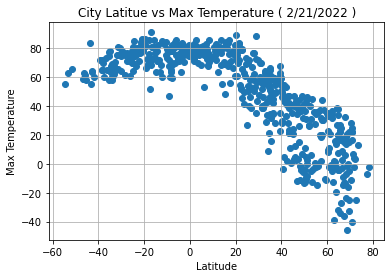

In [17]:
# Create a Scatter Plot for Max temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['Max Temp']

# using now() to get current time 
current_time = datetime.datetime.now() 

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f"City Latitue vs Max Temperature ( {current_time.month }/{current_time.day}/{current_time.year} )" )
plt.grid()

#save figure
plt.savefig("output_data/Latitude_vs_Temperature_Plot.png")

plt.show()


## Latitude vs. Humidity Plot

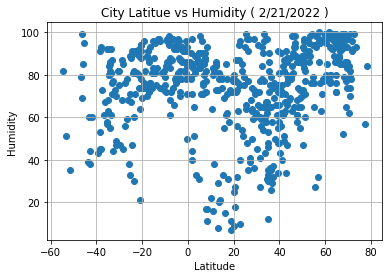

In [18]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['lat']
y_values = weather_data['Humidity']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitue vs Humidity ( {current_time.month }/{current_time.day}/{current_time.year} )" )
plt.grid()

#save figure
plt.savefig("output_data/Latitude_vs_Humidity_Plot.png")

plt.show()

## Latitude vs. Cloudiness Plot

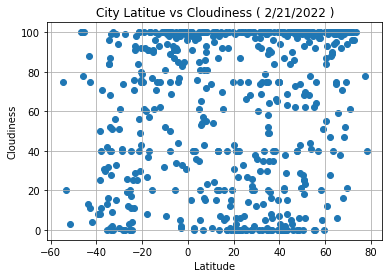

In [20]:
# Create a Scatter Plot for Coldiness vs latitude
x_values = weather_data['lat']
y_values = weather_data['Cloudiness']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitue vs Cloudiness ( {current_time.month }/{current_time.day}/{current_time.year} )" )
plt.grid()

#save figure
plt.savefig("output_data/Latitude_vs_Cloudiness_Plot.png")

plt.show()

## Latitude vs. Wind Speed Plot

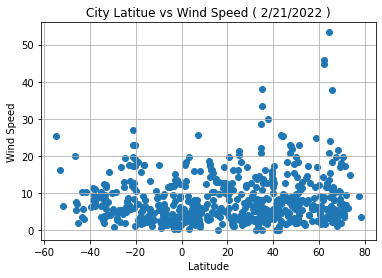

In [21]:
# Create a Scatter Plot for Coldiness vs latitude
x_values = weather_data['lat']
y_values = weather_data['Wind Speed']

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"City Latitue vs Wind Speed ( {current_time.month }/{current_time.day}/{current_time.year} )" )
plt.grid()


#save figure
plt.savefig("output_data/Latitude_vs_WindSpeed_Plot.png")
plt.show()

## Linear Regression

In [22]:
# Create a Scatter Plot for Max temperature vs latitude with linear regression
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


0      32.918721
1      47.371051
2      18.568193
4      68.036634
5      -2.090110
         ...    
573    39.500480
574    19.080780
575    28.956739
576    83.531255
577    52.682007
Name: lat, Length: 397, dtype: float64


In [23]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.28x +89.77


The r-value is: 0.7139892571892975


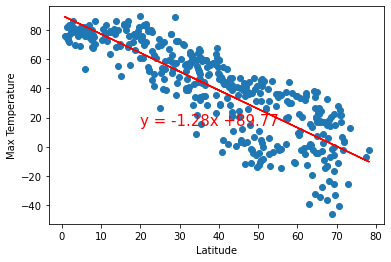

In [24]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


#save figure
plt.savefig("output_data/Northern_Latitude_vs_Temperature_Plot_lin_reg.png")

# Show plot
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

3      67.964455
6      63.291734
7      72.399783
8      69.118813
14     76.152346
         ...    
556    67.948038
561    78.337781
562    66.530958
563    74.183344
569    73.198326
Name: lat, Length: 181, dtype: float64
y = 0.29x +79.05
The r-value is: 0.21633280531655166


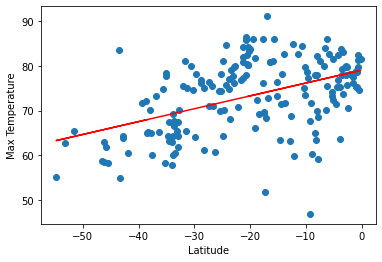

In [25]:
# Create a Scatter Plot for Max temperature vs latitude with linear regression
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Southern_Latitude_vs_Temperature_Plot_lin_reg.png")


# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      75.288596
1      71.014319
2      79.532764
4      64.902473
5      85.642457
         ...    
573    73.342040
574    79.381167
575    76.460352
576    60.319938
577    69.443604
Name: lat, Length: 397, dtype: float64
y = 0.38x +58.47
The r-value is: 0.12796172687024324


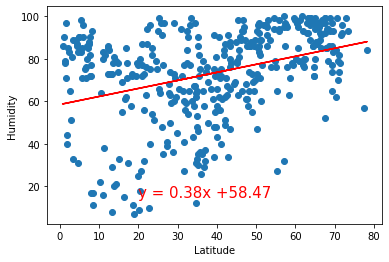

In [26]:
# Create a Scatter Plot for Max temperature vs latitude with linear regression
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Northern_Latitude_vs_Humidity_Plot_lin_reg.png")


# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

3      68.240605
6      60.324665
7      75.754384
8      70.196175
14     82.111508
         ...    
556    68.212794
561    85.813800
562    65.812155
563    78.775872
569    77.107176
Name: lat, Length: 181, dtype: float64
y = 0.49x +87.02
The r-value is: 0.16460777687770276


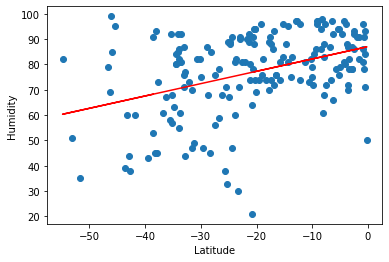

In [27]:
# Create a Scatter Plot for Max temperature vs latitude with linear regression
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Southern_Latitude_vs_Humidity_Plot_lin_reg.png")


# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      65.402849
1      59.973292
2      70.794160
4      52.209495
5      78.555222
         ...    
573    62.930165
574    70.601587
575    66.891315
576    46.388362
577    57.978033
Name: lat, Length: 397, dtype: float64
y = 0.48x +44.04
The r-value is: 0.06464987831500628


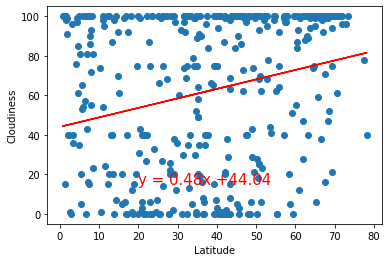

In [28]:
# Create a Scatter Plot for cloudiness vs latitude with linear regression
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Northern_Latitude_vs_Cloudiness_Plot_lin_reg.png")


# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      61.521127
2      58.894994
6      79.240055
8      21.456549
9      58.713646
         ...    
547    32.305429
552    46.736811
554    81.558414
556    63.970969
559    82.787863
Name: lat, Length: 183, dtype: float64
y = 1.18x +85.9
The r-value is: 0.19495810618961798


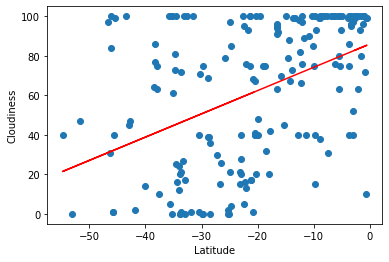

In [67]:
# Create a Scatter Plot for cloudiness vs latitude with linear regression
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Southern_Latitude_vs_Cloudiness_Plot_lin_reg.png")


# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      4.461617
3      4.317601
4      4.406727
5      4.746699
7      4.558381
         ...   
551    4.067404
553    4.184737
555    4.775598
557    4.352567
558    4.646416
Name: lat, Length: 377, dtype: float64
y = 0.02x +3.57
The r-value is: 0.011268379782119276


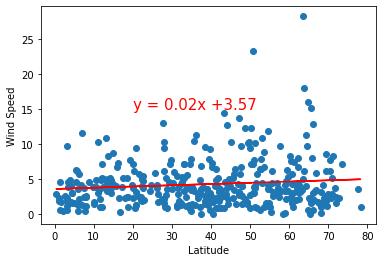

In [68]:
# Create a Scatter Plot for Windspeed vs latitude with linear regression
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Northern_Latitude_vs_WindSpeed_Plot_lin_reg.png")


# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      3.861565
2      3.930740
6      3.394833
8      4.916901
9      3.935517
         ...   
547    4.631132
552    4.250997
554    3.333766
556    3.797034
559    3.301381
Name: lat, Length: 183, dtype: float64
y = -0.03x +3.22
The r-value is: 0.028034912336889366


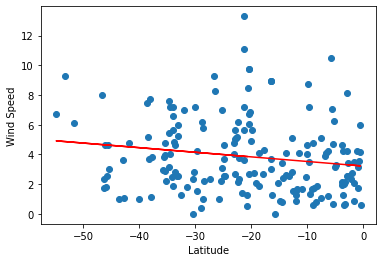

In [69]:
# Create a Scatter Plot for Windspeed vs latitude with linear regression
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#save figure
plt.savefig("output_data/Southern_Latitude_vs_WindSpeed_Plot_lin_reg.png")


# Show plot
plt.show()